[3. 1. 2. 4. 5. 7. 7. 8. 9. 0.]


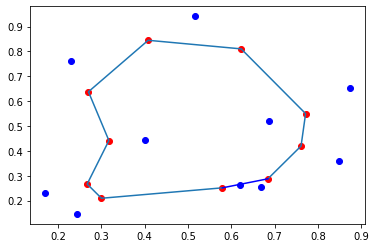

In [133]:
import numpy as np
import matplotlib.pyplot as plt

class SOM:
    def __init__(self, nrOutputNodes, nrFetures, data, nrSamples, stepSize):
        self.weights = np.random.random((nrOutputNodes,nrFetures))
        self.data = data
        self.nrOutputNodes = nrOutputNodes
        self.nrSamples = nrSamples
        self.stepSize = stepSize

    def findMostSimularNode(self, sample):
        distances = np.zeros(self.nrOutputNodes)
        
        for node_index in range(self.nrOutputNodes):         # Measure simularity
            differences = sample - self.weights[node_index]
            distances[node_index] = np.dot(differences.T, differences)
        winnerNode = distances.argmin()
        return winnerNode

    def updateWeightsCyclic(self, sample, winnerNode, neighbourhood):
        start = winnerNode - neighbourhood
        end = winnerNode + neighbourhood
        
        for i in range(start, end):
            deltaW = sample - self.weights[i%self.weights.shape[0]]
            self.weights[i%self.weights.shape[0]] = self.weights[i%self.weights.shape[0]] + (self.stepSize*deltaW)

    def run(self, neighbourhood):
        pos = np.zeros(self.data.shape[0])
        count = 0
        
        for sample in self.data:
            winnerNode = self.findMostSimularNode(sample) # index
            pos[count] = winnerNode
            count = count + 1
            self.updateWeightsCyclic(sample, winnerNode, neighbourhood)

        return pos

def readCities(city_coord, path):
    f = open(path, 'r')
    cities = f.readlines()
    cities = [x.strip() for x in cities]
    
    cityNr = 0
    for coordinate in cities:
        city_coord[cityNr][0], city_coord[cityNr][1] = coordinate.split(', ')
        cityNr += 1

    return city_coord

def getResult(organizedMap,selfOrgMap):
    tour = np.zeros((selfOrgMap.weights.shape[0],selfOrgMap.weights.shape[1]))


def topologyOrderingCities():
    outputNodes = 10
    features = 2
    cities = 10

    props = np.zeros((cities,features))
    path = 'cities.dat'
    props = readCities(props, path)
    plt.plot(props[:,0],props[:,1],'bo')
    
    selfOrgMap = SOM(outputNodes, features, props, cities, 0.2)
    
    ephocs = 20
    nrNeighbours = 2
    for epoch in range(ephocs):
        if epoch == 5:
            nrNeighbours = 1
        elif epoch == 10:
            nrNeighbours = 0
        organizedMap = selfOrgMap.run(nrNeighbours)
    print(organizedMap)

    cities_path = getResult(organizedMap,selfOrgMap)
    plt.plot(selfOrgMap.weights[:,0],selfOrgMap.weights[:,1],'ro')
    plt.plot(selfOrgMap.weights[:,0],selfOrgMap.weights[:,1])
    plt.plot((selfOrgMap.weights[0,0],selfOrgMap.weights[selfOrgMap.weights.shape[0]-1,0]),(selfOrgMap.weights[0,1],selfOrgMap.weights[selfOrgMap.weights.shape[0]-1,1]),'b')
    plt.show()


topologyOrderingCities()